# Derivative calculations

```{admonition} Big idea : Discretisation
:class: tip
We can use the finite difference formulae to estimate the derivative of a function described by a discrete set of points $(x_k,y_k)$.

Obtaining the derivative at the end-points may require us to know the function value at phantom grid-points outside the grid domain.
```

## Using forward differences
Suppose that instead of being given an analytic function $y(x)$, we have a set of (e.g. experimental) points

\begin{equation}(x_1,y_1),(x_2,y_2),\dots,(x_n,y_n).\end{equation}

We can approximate the derivative of the hypothetical function described by these points, using the forward difference estimate

\begin{equation}y_k^{\prime}\simeq\frac{y_{k+1}-y_k}{x_{k+1}-x_k}.\end{equation}

For simplicity we will assume that the grid spacing $h_k=(x_{k+1}-x_k)$ is the same value $h$ for all neighbours (though this isn't necessary), which gives:

$$\begin{align}y^{\prime}&=\biggr[\frac{y(x_2)-y(x_1)}{h},\frac{y(x_3)-y(x_2)}{h},\dots,\frac{y(x_n)-y(x_{n-1})}{h}\biggr]\\&=\frac{[y_2,y_3,\dots,y_n]-[y_1,y_2,\dots,y_{n-1}]}{h}\end{align}$$

The idea, which is not very sophisticated, is illustrated in the schematic diagram below. Essentially, we are joining up the points with straight lines and using the slope of those line segments to estimate the gradient at the left-hand point of each interval.

Notice that with $n$ experimental points we can only find the derivative at the first $(n-1)$ points, because the forward projection of the function at the final point is not known. If we wish to obtain the derivative at $x_n$, we require the phantom exterior value $(x_{n+1},y_{n+1})$.

```{image} images/griddly3.png
:alt: computing the derivative from secant lines
:height: 300px
:align: center
```

The code below provides an implementation of the formula for a given set of points $(x,y)$.

In [1]:
def forward_diff(x,y):

    # Assuming equal grid spacing h
    h = x[1]-x[0]
    fd = (y[1:]-y[0:-1])/h

    # OR
    # No assumption of equal grid spacing
    fd = (y[1:]-y[0:-1])/(x[1:]-x[0:-1])

    return fd

**Example**:

We will demonstrate for the function

\begin{equation}y=\sin(x)+x, \quad y(-\pi)=-\pi\end{equation}

To obtain a result for the derivative at a set of points including the endpoint, we will extend the grid by adding a phantom exterior point at the right hand side.

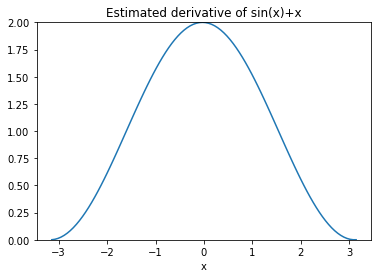

In [2]:
import numpy as np
from math import pi, sin
import matplotlib.pyplot as plt

x = np.linspace(-pi,pi,100)
h = x[1]-x[0]
xx = np.insert(x,len(x), pi+h)
yy = list(map(lambda a: sin(a), xx)) + xx

fd = (yy[1:]-yy[:-1])/h

plt.plot(x, fd)
plt.xlabel('x')
plt.title('Estimated derivative of sin(x)+x')
plt.ylim(0,2)
plt.show()

```{note}
The relevant packages were imported here (numpy, math, matplotlib), therefore no longer need importing in the next sections. But make sure you do import them if you are running some of the sections independently.
```
```{admonition} Discretisation tip
:class: tip
In the above example we allowed python to compute the grid points, by using linspace to ensure that the right-hand end point was included. However, for some applications it may not be convenient to use linspace.

If you want to compute the step size $h$ that will discretise a domain with the right-hand end point included, it is useful to recognise that the $x$ values in the grid are in arithmetic progression. If the first term is $a$, then the last term is $a+(n-1)h$, where $n$ is the number of points. This gives the following result for an interval $[a,b]$

\begin{equation}a+(n-1)h=b \quad \Rightarrow\quad h=\frac{b-a}{n-1}\end{equation}
```